# **GitHub**

In [1]:
from google.colab import auth
auth.authenticate_user()

# Konfigurasi identitas GitHub
!git config --global user.email "satriadivop354@gmail.com"
!git config --global user.name "SatriaDivo"

# Clone repository dengan URL yang benar
!git clone https://@github.com/IET-Polinela/supervised-learning-SatriaDivo

# Masuk ke direktori repository
%cd supervised-learning-SatriaDivo

Cloning into 'supervised-learning-SatriaDivo'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 14 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 754.21 KiB | 16.05 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/supervised-learning-SatriaDivo


# **1. Data Understanding**

In [21]:
# %%writefile data_understanding.py
import pandas as pd

# Load dataset
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# Menghitung statistik deskriptif untuk semua fitur numerik
numeric_df = df.select_dtypes(include=["number"])
stats = numeric_df.describe().T
stats["median"] = numeric_df.median()

# Menampilkan statistik yang diminta
stats = stats[["count", "mean", "median", "std", "min", "25%", "50%", "75%", "max"]]
print("Statistik Deskriptif:\n", stats)

# Menampilkan jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("\nJumlah Nilai yang Hilang:\n", missing_values[missing_values > 0])

# Mengisi nilai yang hilang pada kolom numerik dengan median
for col in numeric_df.columns:
    df[col].fillna(df[col].median(), inplace=True)

print("\nNilai yang hilang pada kolom numerik telah diisi dengan median.")

# Menampilkan kembali jumlah nilai yang hilang setelah imputasi
missing_values_after = df.isnull().sum()
print("\nJumlah Nilai yang Hilang Setelah Imputasi:\n", missing_values_after[missing_values_after > 0])


Statistik Deskriptif:
                 count           mean    median           std      min  \
Id             1460.0     730.500000     730.5    421.610009      1.0   
MSSubClass     1460.0      56.897260      50.0     42.300571     20.0   
LotFrontage    1201.0      70.049958      69.0     24.284752     21.0   
LotArea        1460.0   10516.828082    9478.5   9981.264932   1300.0   
OverallQual    1460.0       6.099315       6.0      1.382997      1.0   
OverallCond    1460.0       5.575342       5.0      1.112799      1.0   
YearBuilt      1460.0    1971.267808    1973.0     30.202904   1872.0   
YearRemodAdd   1460.0    1984.865753    1994.0     20.645407   1950.0   
MasVnrArea     1452.0     103.685262       0.0    181.066207      0.0   
BsmtFinSF1     1460.0     443.639726     383.5    456.098091      0.0   
BsmtFinSF2     1460.0      46.549315       0.0    161.319273      0.0   
BsmtUnfSF      1460.0     567.240411     477.5    441.866955      0.0   
TotalBsmtSF    1460.0    105

<ipython-input-21-1971c0485b69>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


# **2. Data Preprocessing**

In [22]:
# %%writefile data_preprocessing.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# Mengidentifikasi kolom nonnumerik
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns

# Menerapkan encoding untuk fitur-fitur nonnumerik
encoder = LabelEncoder()

for col in non_numeric_cols:
    df[col] = encoder.fit_transform(df[col])

# Menentukan fitur independen (X) dan target/label (Y)
# Misalkan target/label adalah 'SalePrice' (sesuaikan dengan kolom target yang ada pada dataset Anda)
X = df.drop(columns=["SalePrice"])
Y = df["SalePrice"]

# Membagi dataset menjadi training data dan testing data (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data preprocessing selesai.")
print(f"Dimensi training data: X_train={X_train.shape}, Y_train={Y_train.shape}")
print(f"Dimensi testing data: X_test={X_test.shape}, Y_test={Y_test.shape}")

Data preprocessing selesai.
Dimensi training data: X_train=(1168, 80), Y_train=(1168,)
Dimensi testing data: X_test=(292, 80), Y_test=(292,)


# **3. Outlier Handling**

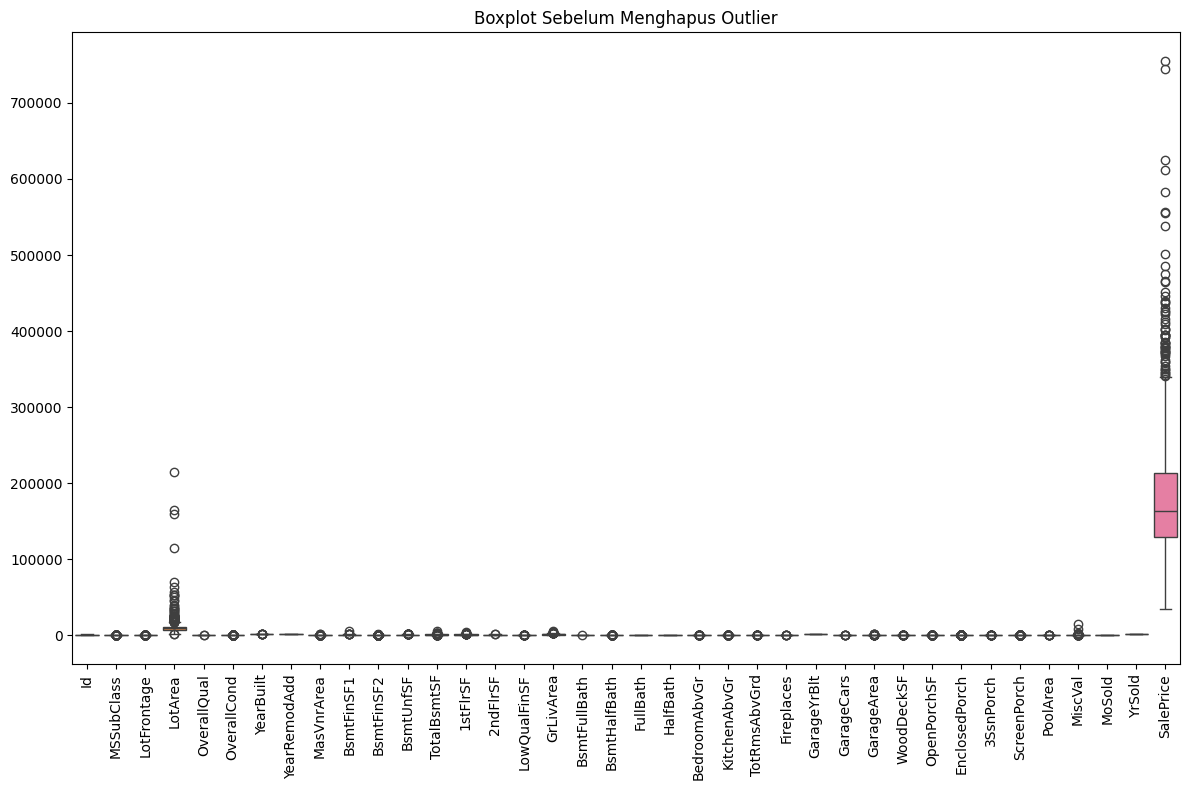

Jumlah baris dengan outlier berdasarkan IQR: 897


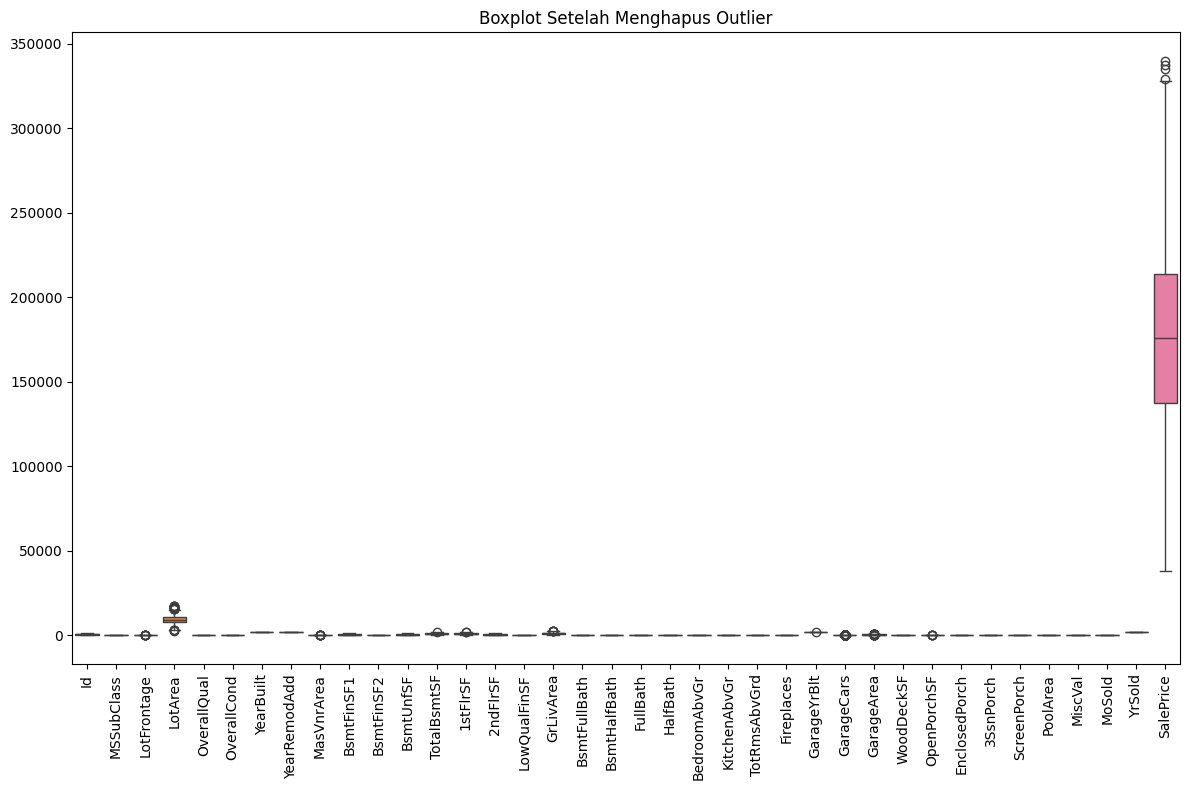

Dataset tanpa outlier telah disimpan sebagai 'HousePricing_no_outliers.csv'.


In [27]:
# %%writefile outlier_handling.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# === Load Dataset ===
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# === Visualisasi Boxplot Awal ===
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title('Boxplot Sebelum Menghapus Outlier')
plt.tight_layout()
plt.show()

# === Deteksi Outlier dengan IQR ===
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Jumlah baris dengan outlier berdasarkan IQR: {outliers_iqr.sum()}")

# Dataset tanpa outlier (IQR)
df_iqr = df[~outliers_iqr]

# === Visualisasi Boxplot Setelah Menghapus Outlier ===
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_iqr.select_dtypes(include=["number"]))
plt.xticks(rotation=90)
plt.title('Boxplot Setelah Menghapus Outlier')
plt.tight_layout()
plt.show()

# === Menyimpan Dataset Tanpa Outlier ===
df_iqr.to_csv("HousePricing_no_outliers.csv", index=False)

print("Dataset tanpa outlier telah disimpan sebagai 'HousePricing_no_outliers.csv'.")

**Push Github**

In [46]:
!git add outlier_handling.py HousePricing_no_outliers.csv
!git commit -m "Perbaikan1"
!git push origin main

[main d66cdfa] Perbaikan1
 1 file changed, 564 insertions(+), 1461 deletions(-)
 rewrite HousePricing_no_outliers.csv (61%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.09 KiB | 268.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo
   a1b0c4c..d66cdfa  main -> main


# **4. Feature Scaling**

Jumlah fitur numerik valid: 38


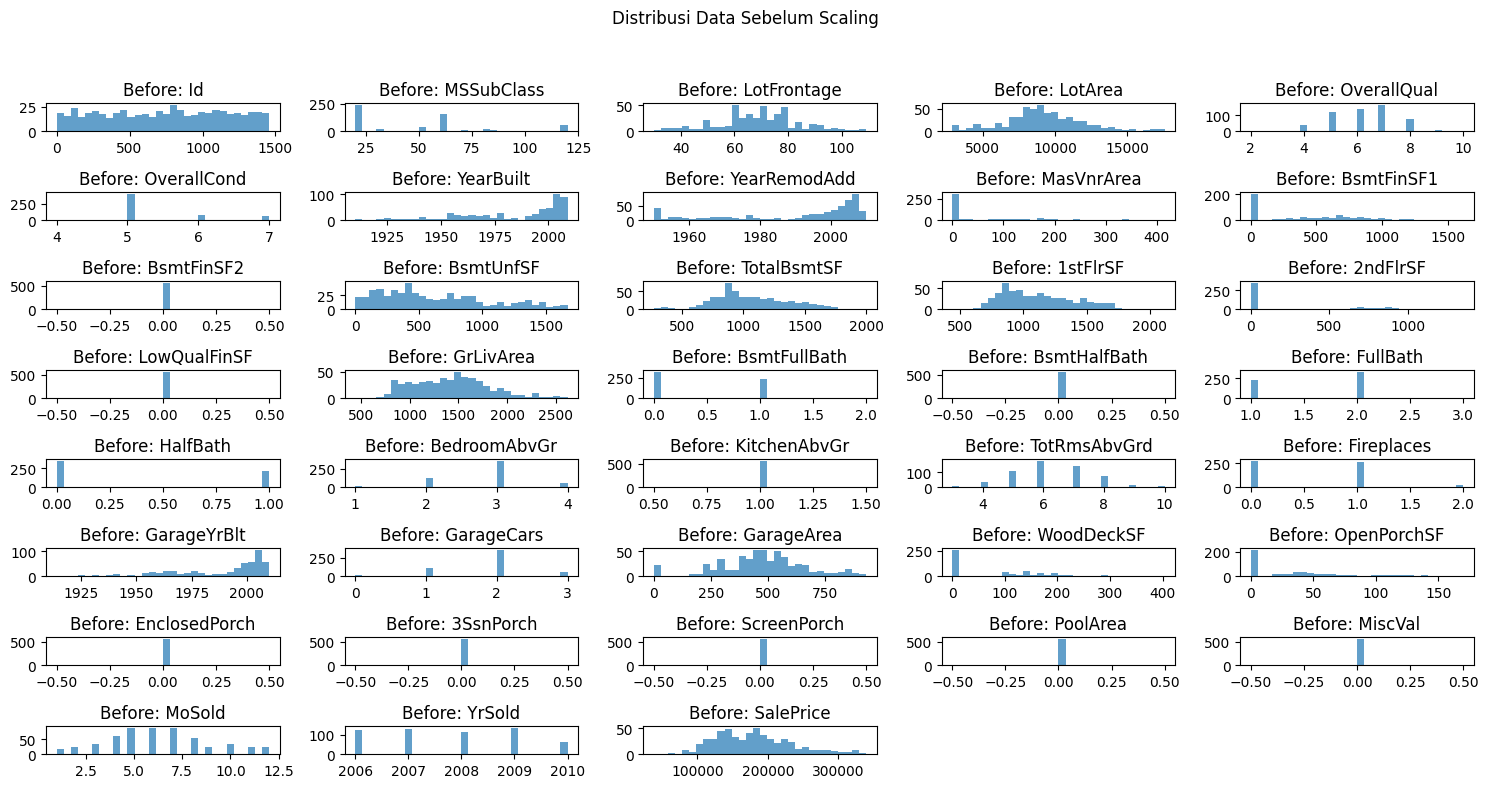

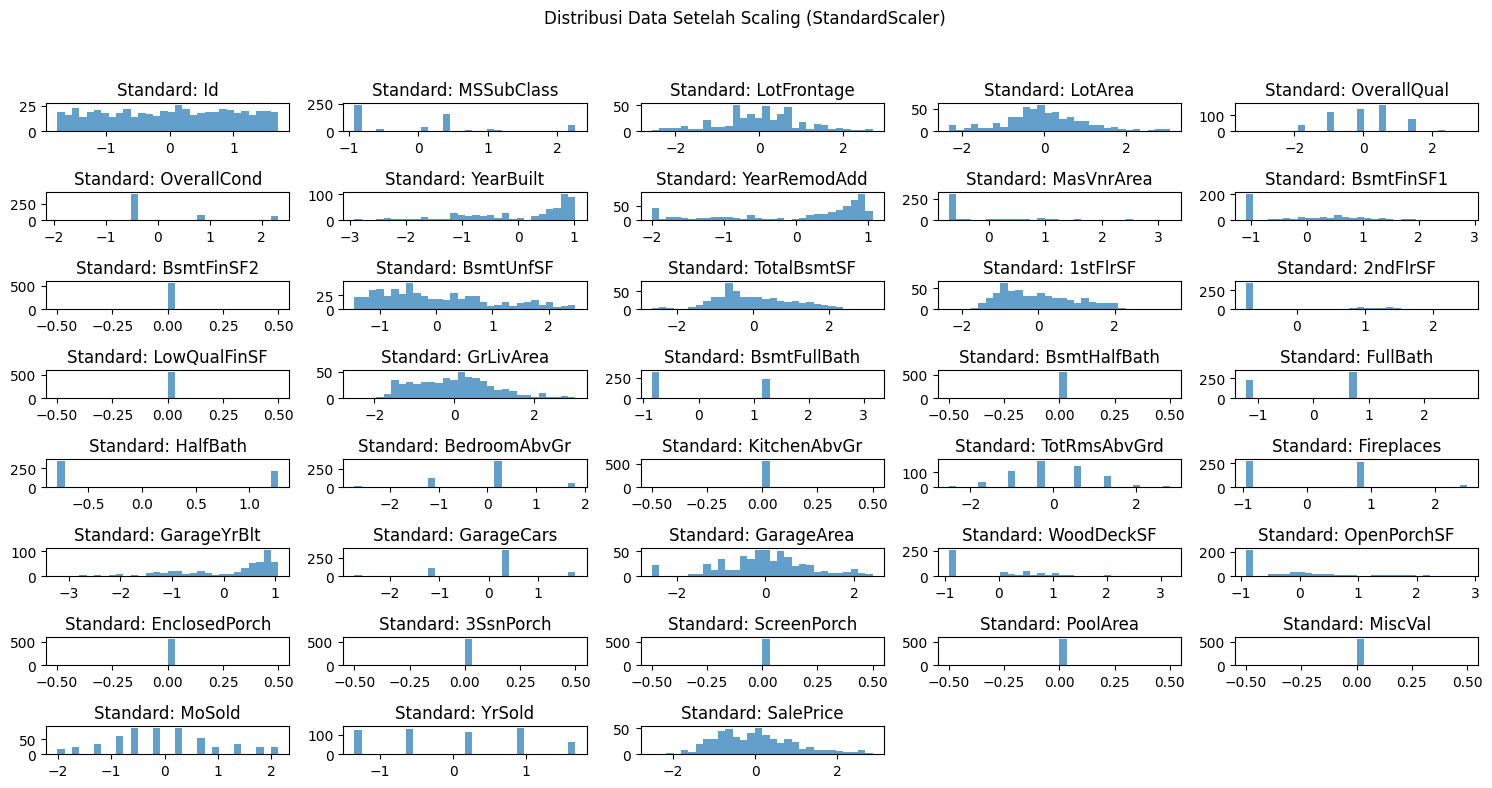

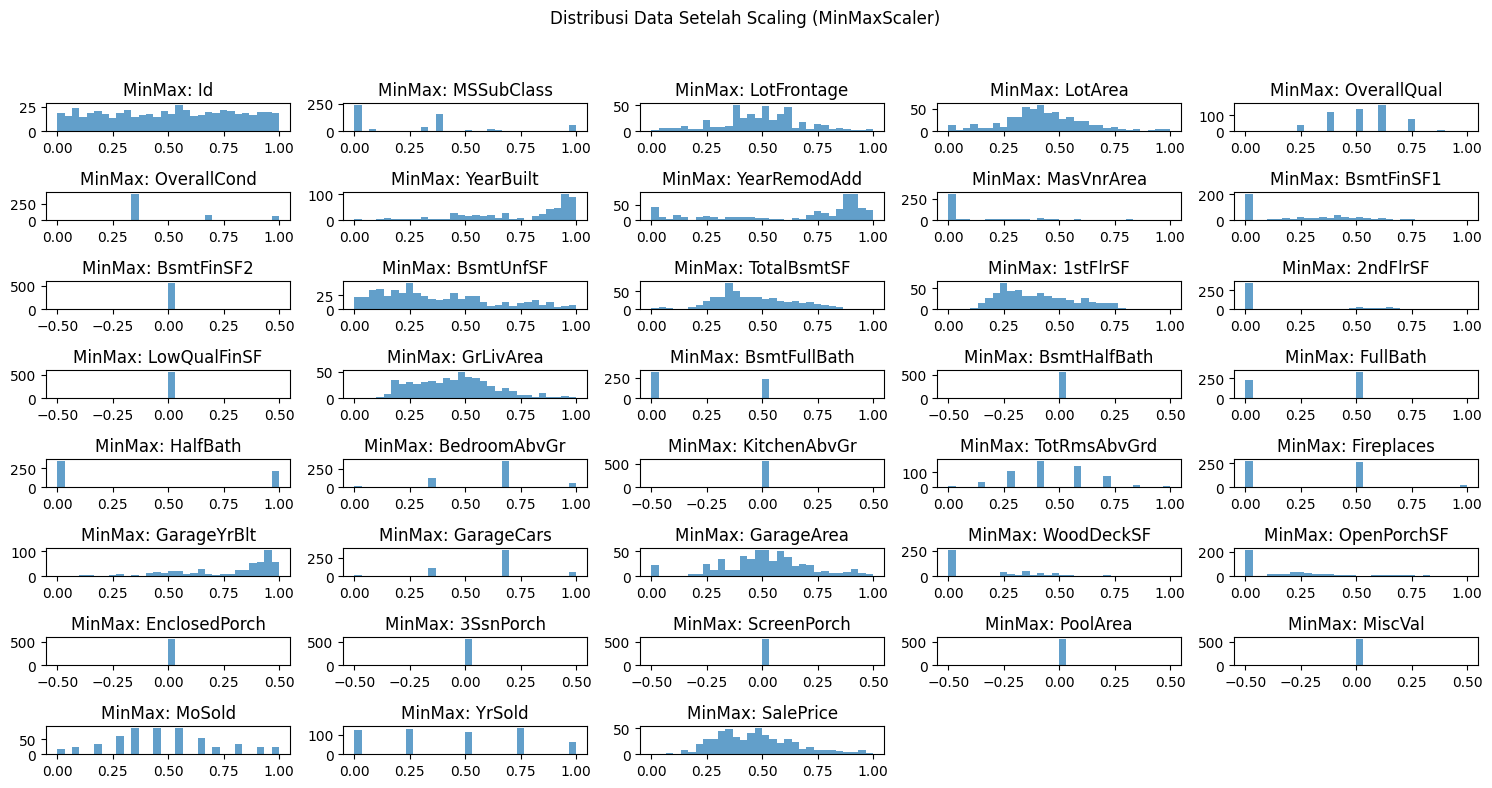

Contoh hasil StandardScaler:
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.759808    0.355555    -0.235460 -0.283781     0.603741    -0.520119   
1 -1.755051    0.355555    -0.035640  0.743896     0.603741    -0.520119   
2 -1.750293    0.355555     1.030064  1.848648     1.403520    -0.520119   
3 -1.745536   -0.917435     0.430605  0.315942     1.403520    -0.520119   
4 -1.736022   -0.917435     0.097573  0.725544    -0.995817    -0.520119   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0   0.784375      0.703197    1.139363    0.636075  ...   -0.920401   
1   0.704671      0.652106    0.819031    0.099558  ...   -0.920401   
2   0.664818      0.549925    2.590278    0.511700  ...    1.024923   
3   0.824228      0.805378    1.045148    2.252940  ...    1.663232   
4  -0.730012     -1.238240   -0.707256    1.123817  ...   -0.920401   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     0.439

In [28]:
# %%writefile feature_scaling.py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Membaca dataset yang sudah dibersihkan dari outlier
file_path = "HousePricing_no_outliers.csv"
df_no_outliers = pd.read_csv(file_path)

# Memilih fitur numerik
numeric_df = df_no_outliers.select_dtypes(include=["number"])

# Drop kolom yang seluruh nilainya NaN agar tidak mengganggu visualisasi dan scaling
valid_numeric_df = numeric_df.dropna(axis=1, how='all')
print(f"Jumlah fitur numerik valid: {valid_numeric_df.shape[1]}")

# Visualisasi sebelum scaling
plt.figure(figsize=(15, 8))
plt.suptitle("Distribusi Data Sebelum Scaling")
ncols = 5
nrows = (len(valid_numeric_df.columns) + ncols - 1) // ncols

for i, col in enumerate(valid_numeric_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(valid_numeric_df[col].dropna(), bins=30, alpha=0.7)
    plt.title(f"Before: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(valid_numeric_df)
scaled_standard_df = pd.DataFrame(scaled_standard, columns=valid_numeric_df.columns)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(valid_numeric_df)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=valid_numeric_df.columns)

# Menyimpan hasil scaling
scaled_standard_df.to_csv("HousePricing_StandardScaled.csv", index=False)
scaled_minmax_df.to_csv("HousePricing_MinMaxScaled.csv", index=False)

# Visualisasi setelah StandardScaler
plt.figure(figsize=(15, 8))
plt.suptitle("Distribusi Data Setelah Scaling (StandardScaler)")
for i, col in enumerate(scaled_standard_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(scaled_standard_df[col].dropna(), bins=30, alpha=0.7)
    plt.title(f"Standard: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualisasi setelah MinMaxScaler
plt.figure(figsize=(15, 8))
plt.suptitle("Distribusi Data Setelah Scaling (MinMaxScaler)")
for i, col in enumerate(scaled_minmax_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(scaled_minmax_df[col].dropna(), bins=30, alpha=0.7)
    plt.title(f"MinMax: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Output head hasil scaling
print("Contoh hasil StandardScaler:")
print(scaled_standard_df.head())
print("\nContoh hasil MinMaxScaler:")
print(scaled_minmax_df.head())

**Push Github**

In [47]:
!git add feature_scaling.py HousePricing_StandardScaled.csv HousePricing_MinMaxScaled.csv
!git commit -m "Perbaikan1"
!git push origin main

[main 788386d] Perbaikan1
 2 files changed, 1128 insertions(+)
 create mode 100644 HousePricing_MinMaxScaled.csv
 create mode 100644 HousePricing_StandardScaled.csv
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 127.46 KiB | 2.77 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo
   d66cdfa..788386d  main -> main


# **5. Implementation: Linear Regression**

Jumlah NaN setelah imputasi: 0
Jumlah NaN setelah imputasi: 0
Jumlah NaN setelah imputasi: 0
Model dengan Outlier - MSE: 2641638813.23, R² Score: 0.66
Model MinMaxScaler - MSE: 0.00, R² Score: 0.90
Model StandardScaler - MSE: 0.13, R² Score: 0.90


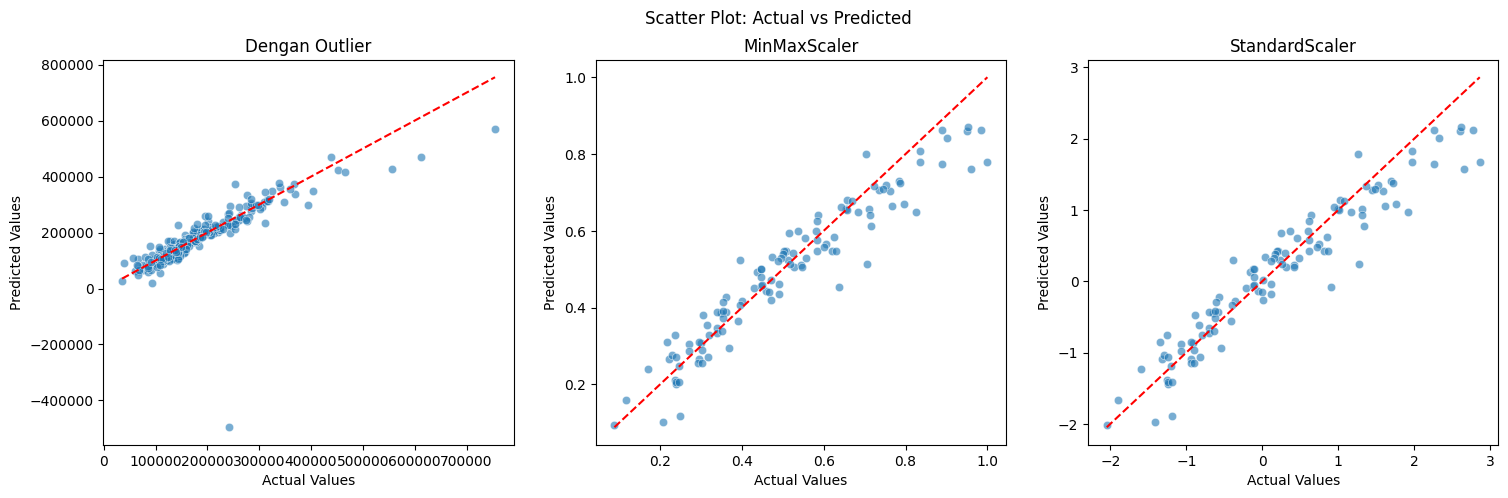

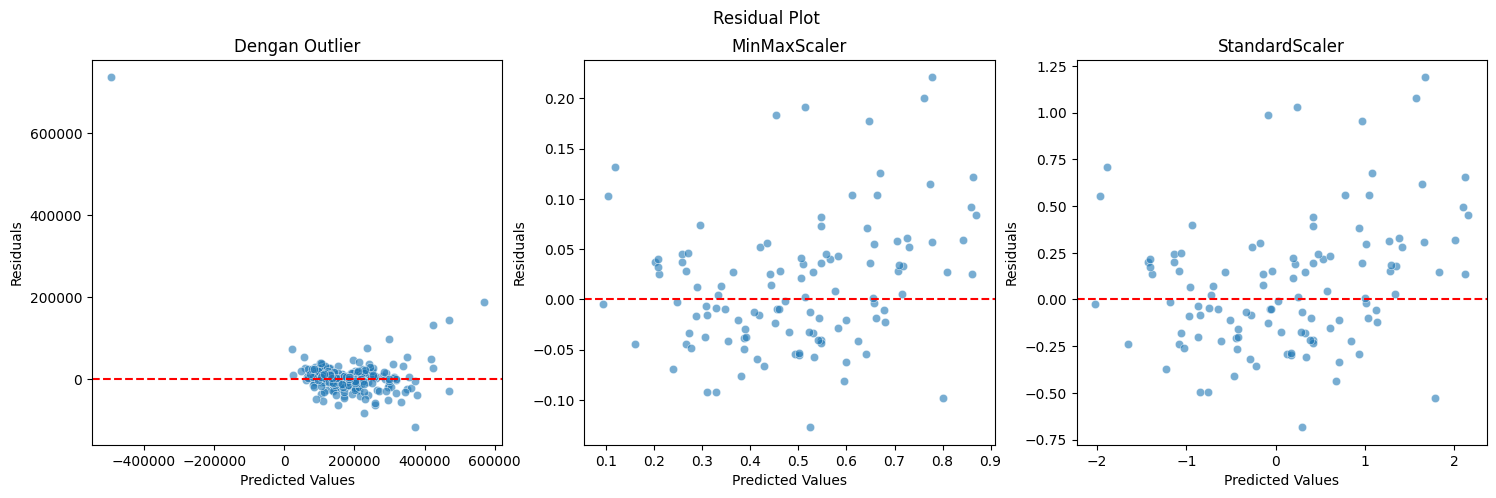

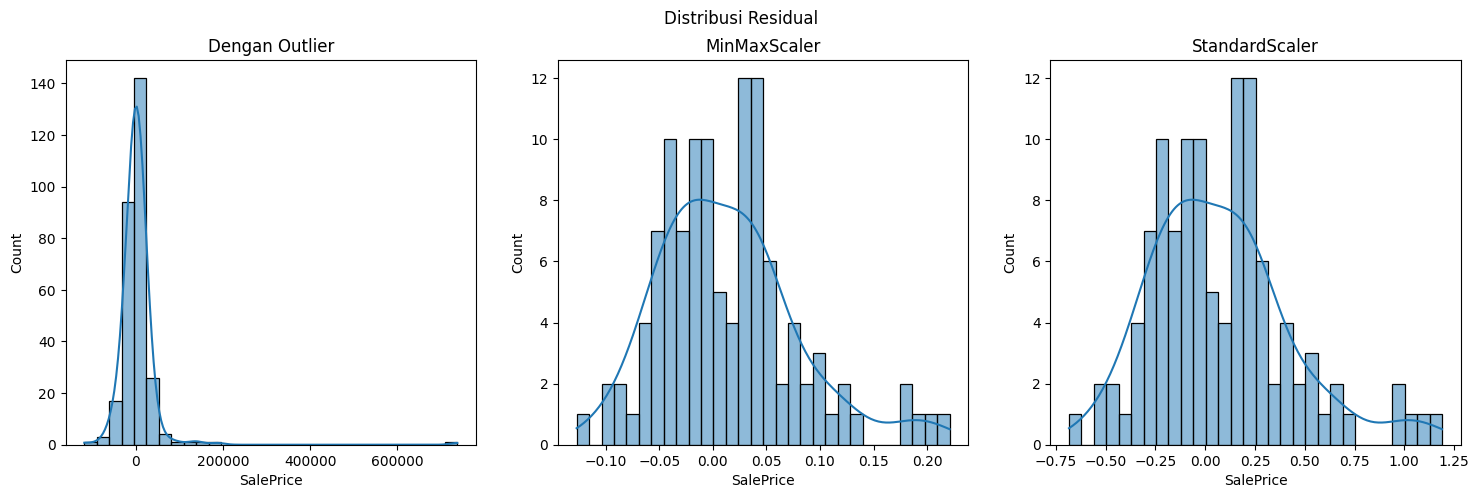

In [30]:
# %%writefile linear_regression.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# === 1. Load Dataset ===
df_outliers = pd.read_csv("HousePricing.csv")
df_minmax = pd.read_csv("HousePricing_MinMaxScaled.csv")
df_standard = pd.read_csv("HousePricing_StandardScaled.csv")

# === 2. Memisahkan Fitur (X) dan Target (y) ===
def prepare_data(df):
    X = df.drop(columns=["SalePrice"])
    y = df["SalePrice"]

    # Menangani missing values pada fitur numerik dan kategorikal
    imputer_num = SimpleImputer(strategy='mean')  # Mengganti NaN dengan mean
    imputer_cat = SimpleImputer(strategy='most_frequent')  # Mengganti NaN dengan modus

    # Pisahkan fitur numerik dan kategorikal
    num_features = X.select_dtypes(include=[np.number]).columns
    cat_features = X.select_dtypes(include=['object']).columns

    # Imputasi nilai NaN hanya jika ada fitur dengan tipe data tersebut
    if len(num_features) > 0:
        X[num_features] = imputer_num.fit_transform(X[num_features])

    if len(cat_features) > 0:
        X[cat_features] = imputer_cat.fit_transform(X[cat_features])

    # Encoding fitur kategorikal jika ada
    if len(cat_features) > 0:
        X = pd.get_dummies(X, drop_first=True, dummy_na=False)

    # Debugging: Periksa apakah masih ada NaN
    print(f"Jumlah NaN setelah imputasi: {X.isnull().sum().sum()}")  # Harus 0

    return X, y

X_outliers, y_outliers = prepare_data(df_outliers)
X_minmax, y_minmax = prepare_data(df_minmax)
X_standard, y_standard = prepare_data(df_standard)

# Pastikan semua dataset memiliki kolom yang sama setelah encoding
X_outliers, X_minmax = X_outliers.align(X_minmax, join='left', axis=1, fill_value=0)
X_outliers, X_standard = X_outliers.align(X_standard, join='left', axis=1, fill_value=0)

# Debugging: Pastikan tidak ada NaN setelah imputasi dan encoding
assert not X_outliers.isnull().values.any(), "X_outliers masih memiliki NaN!"
assert not X_minmax.isnull().values.any(), "X_minmax masih memiliki NaN!"
assert not X_standard.isnull().values.any(), "X_standard masih memiliki NaN!"

# === 3. Membagi Data Menjadi Training dan Testing Set ===
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=42)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

# === 4. Melatih Model Linear Regression ===
model_out = LinearRegression()
model_minmax = LinearRegression()
model_standard = LinearRegression()

model_out.fit(X_train_out, y_train_out)
model_minmax.fit(X_train_minmax, y_train_minmax)
model_standard.fit(X_train_standard, y_train_standard)

# === 5. Prediksi ===
y_pred_out = model_out.predict(X_test_out)
y_pred_minmax = model_minmax.predict(X_test_minmax)
y_pred_standard = model_standard.predict(X_test_standard)

# === 6. Evaluasi Model ===
mse_out = mean_squared_error(y_test_out, y_pred_out)
r2_out = r2_score(y_test_out, y_pred_out)

mse_minmax = mean_squared_error(y_test_minmax, y_pred_minmax)
r2_minmax = r2_score(y_test_minmax, y_pred_minmax)

mse_standard = mean_squared_error(y_test_standard, y_pred_standard)
r2_standard = r2_score(y_test_standard, y_pred_standard)

print(f"Model dengan Outlier - MSE: {mse_out:.2f}, R² Score: {r2_out:.2f}")
print(f"Model MinMaxScaler - MSE: {mse_minmax:.2f}, R² Score: {r2_minmax:.2f}")
print(f"Model StandardScaler - MSE: {mse_standard:.2f}, R² Score: {r2_standard:.2f}")

# === 7. Visualisasi Scatter Plot Prediksi vs Aktual ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Scatter Plot: Actual vs Predicted")

sns.scatterplot(x=y_test_out, y=y_pred_out, alpha=0.6, ax=axes[0])
axes[0].plot([y_test_out.min(), y_test_out.max()], [y_test_out.min(), y_test_out.max()], color="red", linestyle="--")
axes[0].set_title("Dengan Outlier")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

sns.scatterplot(x=y_test_minmax, y=y_pred_minmax, alpha=0.6, ax=axes[1])
axes[1].plot([y_test_minmax.min(), y_test_minmax.max()], [y_test_minmax.min(), y_test_minmax.max()], color="red", linestyle="--")
axes[1].set_title("MinMaxScaler")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

sns.scatterplot(x=y_test_standard, y=y_pred_standard, alpha=0.6, ax=axes[2])
axes[2].plot([y_test_standard.min(), y_test_standard.max()], [y_test_standard.min(), y_test_standard.max()], color="red", linestyle="--")
axes[2].set_title("StandardScaler")
axes[2].set_xlabel("Actual Values")
axes[2].set_ylabel("Predicted Values")

plt.show()

# === 8. Visualisasi Residual Plot ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Residual Plot")

residuals_out = y_test_out - y_pred_out
sns.scatterplot(x=y_pred_out, y=residuals_out, alpha=0.6, ax=axes[0])
axes[0].axhline(y=0, color="red", linestyle="--")
axes[0].set_title("Dengan Outlier")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

residuals_minmax = y_test_minmax - y_pred_minmax
sns.scatterplot(x=y_pred_minmax, y=residuals_minmax, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color="red", linestyle="--")
axes[1].set_title("MinMaxScaler")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

residuals_standard = y_test_standard - y_pred_standard
sns.scatterplot(x=y_pred_standard, y=residuals_standard, alpha=0.6, ax=axes[2])
axes[2].axhline(y=0, color="red", linestyle="--")
axes[2].set_title("StandardScaler")
axes[2].set_xlabel("Predicted Values")
axes[2].set_ylabel("Residuals")

plt.show()

# === 9. Visualisasi Distribusi Residual ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribusi Residual")

sns.histplot(residuals_out, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Dengan Outlier")

sns.histplot(residuals_minmax, bins=30, kde=True, ax=axes[1])
axes[1].set_title("MinMaxScaler")

sns.histplot(residuals_standard, bins=30, kde=True, ax=axes[2])
axes[2].set_title("StandardScaler")

plt.show()

**Push GitHub**

In [41]:
!git add linear_regression.py
!git commit -m "Perbaikan1"
!git push origin main

[main 999c11c] Perbaikan1
 1 file changed, 154 insertions(+), 125 deletions(-)
 rewrite linear_regression.py (65%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.97 KiB | 1.97 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo
   2bc4cca..999c11c  main -> main


# **6. Implementation: Polynomial Regression**


Processing dataset: MinMaxScaled
Terdapat NaN. Mengisi dengan mean...
Linear Regression - MSE: 0.01, R2: 0.71
Polynomial Regression (Degree 2) - MSE: 0.01, R2: 0.73
Polynomial Regression (Degree 3) - MSE: 0.01, R2: 0.73


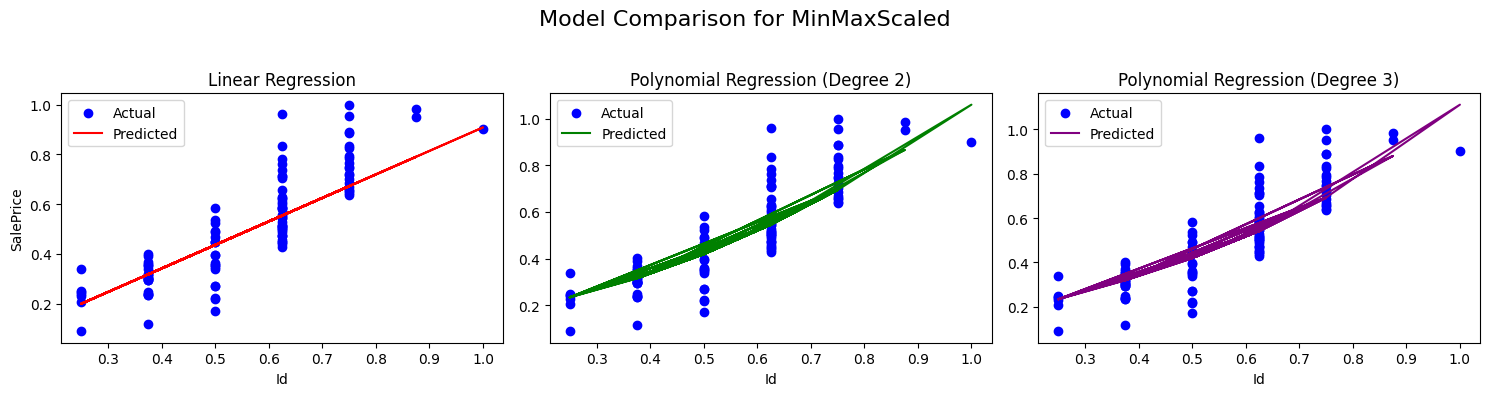


Processing dataset: StandardScaled
Terdapat NaN. Mengisi dengan mean...
Linear Regression - MSE: 0.38, R2: 0.71
Polynomial Regression (Degree 2) - MSE: 0.35, R2: 0.73
Polynomial Regression (Degree 3) - MSE: 0.36, R2: 0.73


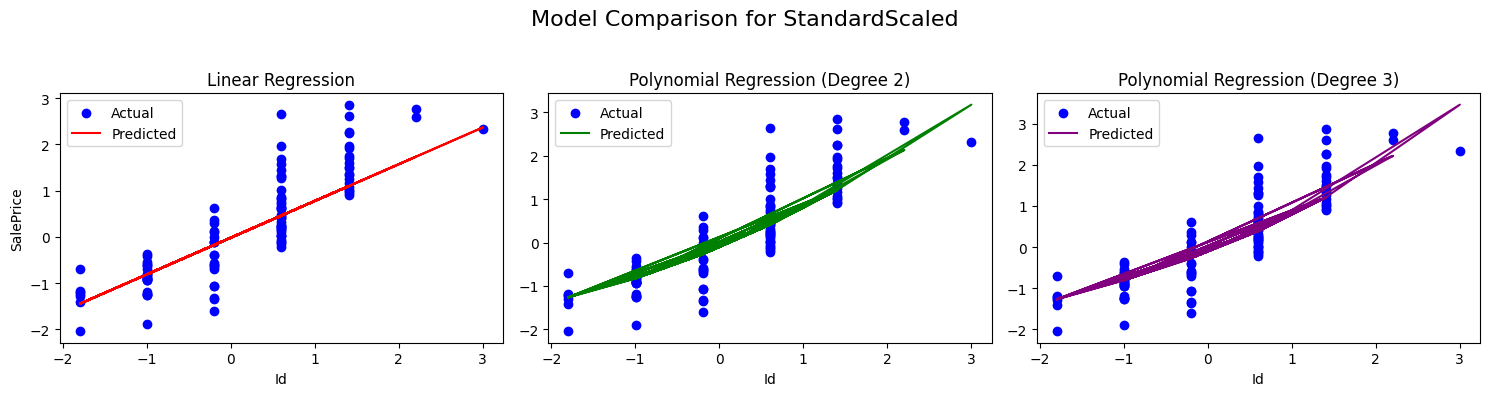

In [32]:
# %%writefile polynomial_regression.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Dataset yang akan dibandingkan
datasets = {
    "MinMaxScaled": "HousePricing_MinMaxScaled.csv",
    "StandardScaled": "HousePricing_StandardScaled.csv"
}

# Loop untuk setiap dataset
for dataset_name, file_path in datasets.items():
    print(f"\nProcessing dataset: {dataset_name}")

    # Load dataset
    data = pd.read_csv(file_path)

    # Tangani missing value jika ada
    if data.isnull().values.any():
        print("Terdapat NaN. Mengisi dengan mean...")
        data.fillna(data.mean(), inplace=True)

    # Pisahkan fitur dan target
    X = data[['OverallQual']]
    y = data['SalePrice']

    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 1. Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    # 2. Polynomial Regression degree=2
    poly2 = PolynomialFeatures(degree=2)
    X_poly2_train = poly2.fit_transform(X_train)
    X_poly2_test = poly2.transform(X_test)

    poly2_model = LinearRegression()
    poly2_model.fit(X_poly2_train, y_train)
    y_pred_poly2 = poly2_model.predict(X_poly2_test)
    mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
    r2_poly2 = r2_score(y_test, y_pred_poly2)

    # 3. Polynomial Regression degree=3
    poly3 = PolynomialFeatures(degree=3)
    X_poly3_train = poly3.fit_transform(X_train)
    X_poly3_test = poly3.transform(X_test)

    poly3_model = LinearRegression()
    poly3_model.fit(X_poly3_train, y_train)
    y_pred_poly3 = poly3_model.predict(X_poly3_test)
    mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
    r2_poly3 = r2_score(y_test, y_pred_poly3)

    # Cetak hasil evaluasi
    print(f"Linear Regression - MSE: {mse_linear:.2f}, R2: {r2_linear:.2f}")
    print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly2:.2f}, R2: {r2_poly2:.2f}")
    print(f"Polynomial Regression (Degree 3) - MSE: {mse_poly3:.2f}, R2: {r2_poly3:.2f}")

    # Visualisasi
    plt.figure(figsize=(15, 4))
    plt.suptitle(f"Model Comparison for {dataset_name}", fontsize=16)

    # Linear
    plt.subplot(1, 3, 1)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_linear, color='red', label='Predicted')
    plt.title("Linear Regression")
    plt.xlabel("Id")
    plt.ylabel("SalePrice")
    plt.legend()

    # Poly 2
    plt.subplot(1, 3, 2)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_poly2, color='green', label='Predicted')
    plt.title("Polynomial Regression (Degree 2)")
    plt.xlabel("Id")
    plt.legend()

    # Poly 3
    plt.subplot(1, 3, 3)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_poly3, color='purple', label='Predicted')
    plt.title("Polynomial Regression (Degree 3)")
    plt.xlabel("Id")
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**Push Github**

In [42]:
!git add polynomial_regression.py
!git commit -m "Perbaikan1"
!git push origin main

[main 48a0c3b] Perbaikan1
 1 file changed, 98 insertions(+), 89 deletions(-)
 rewrite polynomial_regression.py (89%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.30 KiB | 1.30 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo
   999c11c..48a0c3b  main -> main


# **7. Implementation: KNN Regression**


=== Dataset: MinMaxScaler ===

=== Dataset: StandardScaler ===

=== Hasil Evaluasi Model: MinMaxScaler Dataset ===
Model                |          MSE |     R²
---------------------------------------------
Linear Regression    |         0.00 |  0.904
Polynomial (deg=2)   |         0.04 |  0.148
Polynomial (deg=3)   |         0.01 |  0.775
KNN (k=3)            |         0.01 |  0.743
KNN (k=5)            |         0.01 |  0.759
KNN (k=7)            |         0.01 |  0.764


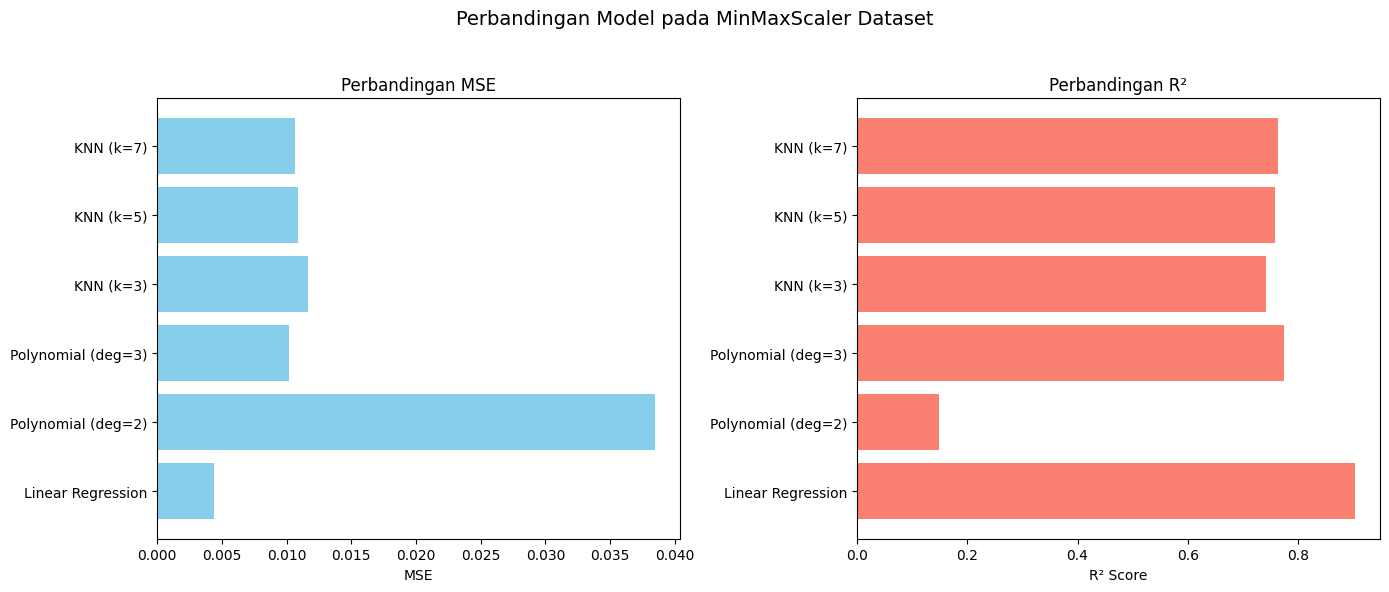


=== Hasil Evaluasi Model: StandardScaler Dataset ===
Model                |          MSE |     R²
---------------------------------------------
Linear Regression    |         0.13 |  0.904
Polynomial (deg=2)   |         1.11 |  0.148
Polynomial (deg=3)   |         0.29 |  0.777
KNN (k=3)            |         0.25 |  0.806
KNN (k=5)            |         0.25 |  0.809
KNN (k=7)            |         0.25 |  0.810


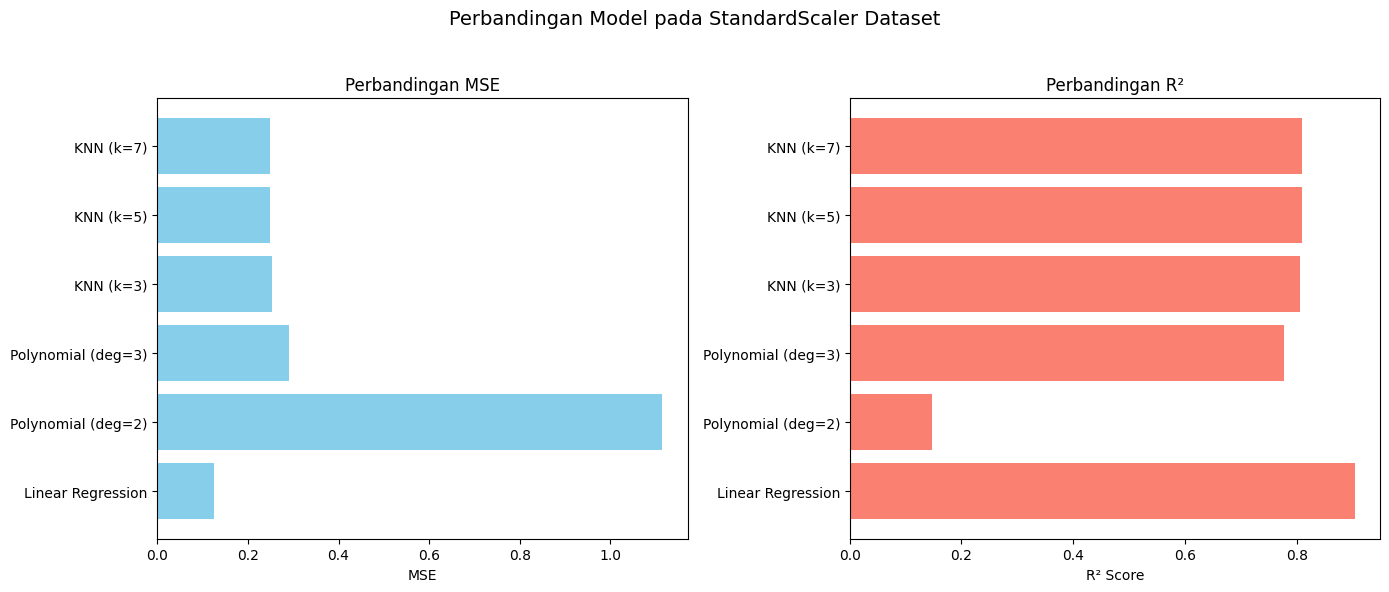

In [35]:
# %%writefile knn_regression.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Load Dataset ===
df_minmax = pd.read_csv("HousePricing_MinMaxScaled.csv")
df_standard = pd.read_csv("HousePricing_StandardScaled.csv")

# Fungsi preprocessing
def prepare_data(df):
    X = df.drop(columns=["SalePrice", "Id"], errors="ignore")
    y = df["SalePrice"]

    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    return X, y

# Siapkan dataset
datasets = {
    "MinMaxScaler": prepare_data(df_minmax),
    "StandardScaler": prepare_data(df_standard)
}

# Nilai K untuk KNN
k_values = [3, 5, 7]

# Simpan hasil perbandingan
comparison_results = {}

# Loop untuk masing-masing dataset
for name, (X, y) in datasets.items():
    print(f"\n=== Dataset: {name} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    result = {}

    # --- Linear Regression ---
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    result["Linear Regression"] = {
        "MSE": mean_squared_error(y_test, y_pred_lr),
        "R²": r2_score(y_test, y_pred_lr)
    }

    # --- Polynomial Regression degree = 2 ---
    poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly2.fit(X_train, y_train)
    y_pred_poly2 = poly2.predict(X_test)
    result["Polynomial (deg=2)"] = {
        "MSE": mean_squared_error(y_test, y_pred_poly2),
        "R²": r2_score(y_test, y_pred_poly2)
    }

    # --- Polynomial Regression degree = 3 ---
    poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
    poly3.fit(X_train, y_train)
    y_pred_poly3 = poly3.predict(X_test)
    result["Polynomial (deg=3)"] = {
        "MSE": mean_squared_error(y_test, y_pred_poly3),
        "R²": r2_score(y_test, y_pred_poly3)
    }

    # --- KNN Regression ---
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)

        result[f"KNN (k={k})"] = {
            "MSE": mean_squared_error(y_test, y_pred_knn),
            "R²": r2_score(y_test, y_pred_knn)
        }

    # Simpan hasil
    comparison_results[name] = result

# === Cetak Nilai dan Visualisasi ===
for name in comparison_results:
    print(f"\n=== Hasil Evaluasi Model: {name} Dataset ===")
    print("{:<20s} | {:>12s} | {:>6s}".format("Model", "MSE", "R²"))
    print("-" * 45)

    model_names = list(comparison_results[name].keys())
    mse_values = []
    r2_values = []

    for model in model_names:
        mse = comparison_results[name][model]["MSE"]
        r2 = comparison_results[name][model]["R²"]
        mse_values.append(mse)
        r2_values.append(r2)
        print("{:<20s} | {:12.2f} | {:6.3f}".format(model, mse, r2))

    # Visualisasi
    plt.figure(figsize=(14, 6))
    plt.suptitle(f"Perbandingan Model pada {name} Dataset", fontsize=14)

    # MSE plot
    plt.subplot(1, 2, 1)
    plt.barh(model_names, mse_values, color='skyblue')
    plt.xlabel("MSE")
    plt.title("Perbandingan MSE")

    # R² plot
    plt.subplot(1, 2, 2)
    plt.barh(model_names, r2_values, color='salmon')
    plt.xlabel("R² Score")
    plt.title("Perbandingan R²")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**Push GitHub**

In [43]:
!git add knn_regression.py
!git commit -m "Perbaikan1"
!git push origin main

[main a1b0c4c] Perbaikan1
 1 file changed, 122 insertions(+), 123 deletions(-)
 rewrite knn_regression.py (93%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.52 KiB | 1.52 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo
   48a0c3b..a1b0c4c  main -> main


# **Menyimpan file .ipynb ke GitHub**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
!cp "/content/drive/MyDrive/Collab/Lab4_23758056.ipynb" "/content/supervised-learning-SatriaDivo/"

# **Push GitHub**

In [ ]:
!git add Lab4_23758056.ipyb
!git commit -m "Perbaikan1"
!git push origin main